[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farheenfab/AppliedText_CW/blob/main/CW1-analyze_dataset.ipynb)

In [75]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [76]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import nltk
import spacy


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fayazbadubhai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

In [77]:
# get file from disk
filename = 'final_comments_df.csv'
final_comments_df=pd.read_csv(filename)

In [78]:
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Midsommar (2019) Movie,MIDSOMMAR | Official Trailer HD | A24,1Vnghdsjmd0,A24,2019-05-14T13:00:03Z,SUBSCRIBE: http://bit.ly/A24subscribe THIS SUM...,https://i.ytimg.com/vi/1Vnghdsjmd0/default.jpg,UgzI6YAPLH8eqioRmWt4AaABAg,NaN,johannabelle,2019-05-14T22:09:47Z,2019-05-14T22:09:47Z,67552,"tbh forget the cult stuff, traveling with peop..."
1,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgyJSYhpoqBFfmBWJVd4AaABAg,NaN,eeveecruz5541,2020-08-23T04:06:40Z,2020-08-23T04:06:40Z,61291,the fact that the song is actually swedish mak...
2,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgwmR0G3O_M-MkuatRp4AaABAg,NaN,robertthegamecat9548,2020-11-19T07:04:25Z,2020-11-19T07:04:25Z,59091,"Every character in the movie: ""Danni, I don't ..."
3,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,Ugy8N6aSrSpitErBg7p4AaABAg,NaN,dogman985,2020-04-16T23:29:32Z,2020-04-16T23:29:32Z,52530,Whatchu mean not for us
4,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgybZ3eMcxPO2RTwIfZ4AaABAg,NaN,Clara-yj3fe,2020-11-16T21:33:55Z,2020-11-16T21:33:55Z,52390,the fact that ive never watched the movie and ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Midsommar (2019) Movie,Midsommar (2019) Ending Scene [4K],x2ABJAyfVpw,Ian,2020-07-25T06:41:42Z,Midsommar #AriAster #A24 #4K Synopsis: A coupl...,https://i.ytimg.com/vi/x2ABJAyfVpw/default.jpg,UgzXJuacqbXJjTjh_8B4AaABAg,NaN,UncleJun50,2021-08-04T09:03:59Z,2021-08-04T09:03:59Z,2588,Everyone died in a horrific fashion and the on...
196,Midsommar (2019) Movie,Midsommar (2019) Ending Scene [4K],x2ABJAyfVpw,Ian,2020-07-25T06:41:42Z,Midsommar #AriAster #A24 #4K Synopsis: A coupl...,https://i.ytimg.com/vi/x2ABJAyfVpw/default.jpg,UgzlgWZGa-4cmZEMfSB4AaABAg,NaN,kjw111,2021-06-12T00:05:44Z,2021-06-12T00:05:44Z,2564,This movie is a reflection most haven’t recogn...
197,Midsommar (2019) Movie,The Horror of MIDSOMMAR Explained,uC_y4CC2VRM,FilmComicsExplained,2020-10-25T14:03:44Z,"Written and Directed by Ari Aster, Midsommar f...",https://i.ytimg.com/vi/uC_y4CC2VRM/default.jpg,UgyuNuBSIdGzES2HuMx4AaABAg,NaN,ThePlkjj,2020-11-21T08:58:56Z,2020-11-21T08:58:56Z,2553,I normally hate Horror films because of all th...
198,Midsommar (2019) Movie,Midsommar (2019) KILL COUNT,uW9fbnLgkpI,Dead Meat,2021-06-18T13:00:33Z,MERCH: http://deadmeatstore.com Buy Midsommar ...,https://i.ytimg.com/vi/uW9fbnLgkpI/default.jpg,Ugxb4Y8b2jfc0w8OY8t4AaABAg.9Pl5xeh8n_i9PsfFk-bxuG,Ugxb4Y8b2jfc0w8OY8t4AaABAg,toniamcrae,2021-07-17T00:50:11Z,2021-07-17T00:50:11Z,2524,I literally just watched this movie & in no wa...


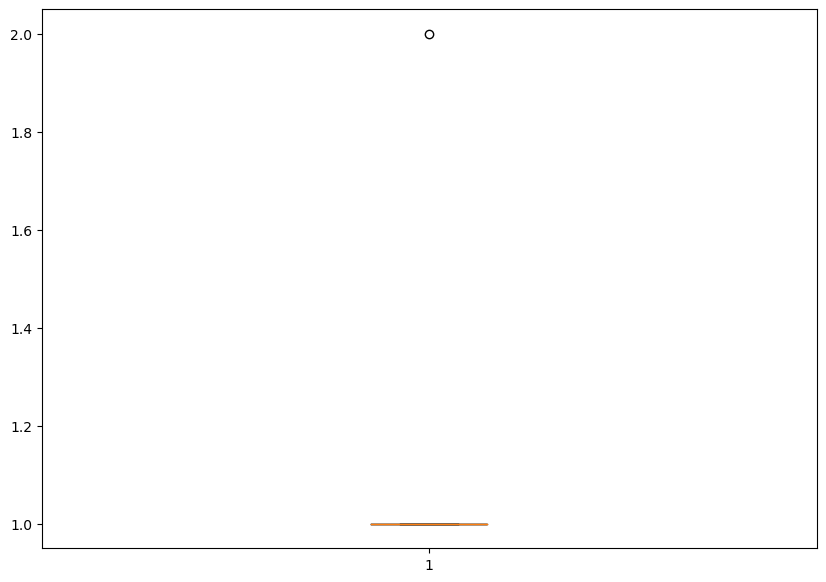

In [79]:
import matplotlib.pyplot as plt

data = final_comments_df['c_like_count'].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.show()


In [80]:
# number of comments per product 
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Midsommar (2019) Movie,200


In [81]:
# product 0 is generated due to how I handled videos with comments disabled
# remove comments according to like threshold
# this is done to make sure the comment are relevent 
like_threshold=1
final_comments_df=final_comments_df[final_comments_df['c_like_count'] >= like_threshold]
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Midsommar (2019) Movie,MIDSOMMAR | Official Trailer HD | A24,1Vnghdsjmd0,A24,2019-05-14T13:00:03Z,SUBSCRIBE: http://bit.ly/A24subscribe THIS SUM...,https://i.ytimg.com/vi/1Vnghdsjmd0/default.jpg,UgzI6YAPLH8eqioRmWt4AaABAg,NaN,johannabelle,2019-05-14T22:09:47Z,2019-05-14T22:09:47Z,67552,"tbh forget the cult stuff, traveling with peop..."
1,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgyJSYhpoqBFfmBWJVd4AaABAg,NaN,eeveecruz5541,2020-08-23T04:06:40Z,2020-08-23T04:06:40Z,61291,the fact that the song is actually swedish mak...
2,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgwmR0G3O_M-MkuatRp4AaABAg,NaN,robertthegamecat9548,2020-11-19T07:04:25Z,2020-11-19T07:04:25Z,59091,"Every character in the movie: ""Danni, I don't ..."
3,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,Ugy8N6aSrSpitErBg7p4AaABAg,NaN,dogman985,2020-04-16T23:29:32Z,2020-04-16T23:29:32Z,52530,Whatchu mean not for us
4,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgybZ3eMcxPO2RTwIfZ4AaABAg,NaN,Clara-yj3fe,2020-11-16T21:33:55Z,2020-11-16T21:33:55Z,52390,the fact that ive never watched the movie and ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Midsommar (2019) Movie,Midsommar (2019) Ending Scene [4K],x2ABJAyfVpw,Ian,2020-07-25T06:41:42Z,Midsommar #AriAster #A24 #4K Synopsis: A coupl...,https://i.ytimg.com/vi/x2ABJAyfVpw/default.jpg,UgzXJuacqbXJjTjh_8B4AaABAg,NaN,UncleJun50,2021-08-04T09:03:59Z,2021-08-04T09:03:59Z,2588,Everyone died in a horrific fashion and the on...
196,Midsommar (2019) Movie,Midsommar (2019) Ending Scene [4K],x2ABJAyfVpw,Ian,2020-07-25T06:41:42Z,Midsommar #AriAster #A24 #4K Synopsis: A coupl...,https://i.ytimg.com/vi/x2ABJAyfVpw/default.jpg,UgzlgWZGa-4cmZEMfSB4AaABAg,NaN,kjw111,2021-06-12T00:05:44Z,2021-06-12T00:05:44Z,2564,This movie is a reflection most haven’t recogn...
197,Midsommar (2019) Movie,The Horror of MIDSOMMAR Explained,uC_y4CC2VRM,FilmComicsExplained,2020-10-25T14:03:44Z,"Written and Directed by Ari Aster, Midsommar f...",https://i.ytimg.com/vi/uC_y4CC2VRM/default.jpg,UgyuNuBSIdGzES2HuMx4AaABAg,NaN,ThePlkjj,2020-11-21T08:58:56Z,2020-11-21T08:58:56Z,2553,I normally hate Horror films because of all th...
198,Midsommar (2019) Movie,Midsommar (2019) KILL COUNT,uW9fbnLgkpI,Dead Meat,2021-06-18T13:00:33Z,MERCH: http://deadmeatstore.com Buy Midsommar ...,https://i.ytimg.com/vi/uW9fbnLgkpI/default.jpg,Ugxb4Y8b2jfc0w8OY8t4AaABAg.9Pl5xeh8n_i9PsfFk-bxuG,Ugxb4Y8b2jfc0w8OY8t4AaABAg,toniamcrae,2021-07-17T00:50:11Z,2021-07-17T00:50:11Z,2524,I literally just watched this movie & in no wa...


In [82]:
# number of comments remaining per product after filtering
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Midsommar (2019) Movie,200


In [83]:
final_comments_df.groupby('v_title').size().reset_index(name='counts')


,v_title,counts
0,MIDSOMMAR (2019) Story + Ending Explained,49
1,MIDSOMMAR | Official Teaser Trailer HD | A24,5
2,MIDSOMMAR | Official Trailer HD | A24,38
3,Midsommar (2019) - Ending Explained!,3
4,Midsommar (2019) Ending Scene [4K],12
5,Midsommar (2019) KILL COUNT,33
6,Midsommar Deleted Scene (Director&#39;s Cut),17
7,That Midsommar scene but it&#39;s even more di...,22
8,The Horror of MIDSOMMAR Explained,21


In [84]:
# get sentiment
def analyze_sentiment(comment):
    try:
        analysis = TextBlob(comment)
        return analysis.sentiment.polarity
    except:
        return 0.0
# Textblob sentiment analysis used due to the size of the dataset
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_blob_sentiment"] = final_comments_df['c_text'].apply(analyze_sentiment)
final_comments_df[['v_title','c_text','c_author','c_blob_sentiment']].sort_values('c_blob_sentiment')

,v_title,c_text,c_author,c_blob_sentiment
34,MIDSOMMAR (2019) Story + Ending Explained,Homie had the worst post nut clarity moment in...,ShadowDolphn,-1.0
168,MIDSOMMAR | Official Trailer HD | A24,This movie literally felt like a bad acid dream,Maria-tl9lw,-0.7
148,MIDSOMMAR | Official Trailer HD | A24,Because of this my sister is afraid of swedish...,youareallscums,-0.6
95,MIDSOMMAR (2019) Story + Ending Explained,The mating scene was extremely disturbing,kinganson7908,-0.5
51,MIDSOMMAR | Official Trailer HD | A24,You can tell a horror movie is gonna be really...,gummypuss69,-0.5
...,...,...,...,...
55,The Horror of MIDSOMMAR Explained,This movie was an excellent example of how jus...,TicTacPilgrim,0.9
23,The Horror of MIDSOMMAR Explained,This is the greatest movie I never wanna watch...,Kiss_My_Aspergers,1.0
164,MIDSOMMAR | Official Trailer HD | A24,"coachella: ""we are the best festival to ever h...",littleduckiiee,1.0
135,MIDSOMMAR | Official Trailer HD | A24,I'm Swedish and I can confirm that this is how...,jahrmusic,1.0


In [98]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text,c_blob_sentiment,c_sentiment
0,Midsommar (2019) Movie,MIDSOMMAR | Official Trailer HD | A24,1Vnghdsjmd0,A24,2019-05-14T13:00:03Z,SUBSCRIBE: http://bit.ly/A24subscribe THIS SUM...,https://i.ytimg.com/vi/1Vnghdsjmd0/default.jpg,UgzI6YAPLH8eqioRmWt4AaABAg,NaN,johannabelle,2019-05-14T22:09:47Z,2019-05-14T22:09:47Z,67552,"tbh forget the cult stuff, traveling with peop...",0.000000,neutral
1,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgyJSYhpoqBFfmBWJVd4AaABAg,NaN,eeveecruz5541,2020-08-23T04:06:40Z,2020-08-23T04:06:40Z,61291,the fact that the song is actually swedish mak...,0.166667,positive
2,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgwmR0G3O_M-MkuatRp4AaABAg,NaN,robertthegamecat9548,2020-11-19T07:04:25Z,2020-11-19T07:04:25Z,59091,"Every character in the movie: ""Danni, I don't ...",0.000000,neutral
3,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,Ugy8N6aSrSpitErBg7p4AaABAg,NaN,dogman985,2020-04-16T23:29:32Z,2020-04-16T23:29:32Z,52530,Whatchu mean not for us,-0.312500,negative
4,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgybZ3eMcxPO2RTwIfZ4AaABAg,NaN,Clara-yj3fe,2020-11-16T21:33:55Z,2020-11-16T21:33:55Z,52390,the fact that ive never watched the movie and ...,0.000000,neutral
5,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgwVldBlwF6joIVB-oF4AaABAg,NaN,tspmcfarlane,2020-11-21T01:00:21Z,2020-11-21T01:00:21Z,49754,Just gonna take a moment to recognise the incr...,0.633333,positive
6,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,UgwMdgiGm6C-twn0ozV4AaABAg,NaN,iiikaruz,2020-10-29T23:57:20Z,2020-10-29T23:57:20Z,49748,"i don't know why, but the multicolor lights re...",0.000000,neutral
7,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,Ugy_UJDcU7_EXMtI1_d4AaABAg,NaN,chuquillanquivega,2020-11-15T03:22:39Z,2020-11-15T03:22:39Z,47621,when your vanilla straight friend goes to a ga...,0.288889,positive
8,Midsommar (2019) Movie,That Midsommar scene but it&#39;s even more di...,SCDLBLPOzj8,Pepe Rico Piqué,2020-04-06T16:50:55Z,I'm shit doing masks. Watch with headphones fo...,https://i.ytimg.com/vi/SCDLBLPOzj8/default.jpg,Ugw_VPiVEsgHTnNSP4l4AaABAg,NaN,i.washere,2021-04-23T23:34:21Z,2021-04-23T23:34:21Z,41222,*Dani throughout the movie:*\n,0.000000,neutral
9,Midsommar (2019) Movie,Midsommar (2019) KILL COUNT,uW9fbnLgkpI,Dead Meat,2021-06-18T13:00:33Z,MERCH: http://deadmeatstore.com Buy Midsommar ...,https://i.ytimg.com/vi/uW9fbnLgkpI/default.jpg,UgykE7RyyCU-U6ydMgJ4AaABAg,NaN,TheRealGuywithoutaMustache,2021-06-19T19:06:53Z,2021-06-19T19:06:53Z,39220,It's a genuinely bizarre movie that perfectly ...,0.300000,positive


Im not sure if even mapping is the correct choice but ill go with this for now

In [85]:
def map_sentiment(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    else:
        return "neutral"
    
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_sentiment"] = final_comments_df['c_blob_sentiment'].apply(map_sentiment)
final_comments_df[['v_videoId','c_text','c_blob_sentiment','c_sentiment']].sort_values('c_sentiment')
final_comments_df["c_sentiment"].value_counts()

c_sentiment
positive    109
negative     57
neutral      34
Name: count, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

X = final_comments_df['c_text'] 
y = final_comments_df['c_sentiment'] 
# create a 20% test 80% train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# product specific stopwords
product_tokens=np.concatenate([word_tokenize(product.lower()) for product in final_comments_df['product'].unique()])
# remove digits and any single character
product_tokens = [token for token in product_tokens if len(token) > 1 and not token.isdigit()]
product_tokens += ['drama', 'film', 'cinema', 'actor', 'actress', 'director', 'plot',
                         'scene', 'genre', 'subtitles', 'k-drama', 'kdrama', 'k-movie', 'television',
                         'episode', 'screenplay', 'script', 'cinematography', 'soundtrack',
                         'OST', 'character', 'plot twist', 'review', 'ratings', 'premiere',
                         'streaming', 'watchlist', 'subbed', 'dubbed', 'sequel', 'game', 'song',
                         'season', 'trailer', 'casting', 'fanbase', 'recommendation', 'goblin',
                         'viewer', 'critic', 'Korean', 'entertainment', 'watched', 'guardian',
                         'show', 'squid', 'watch', 'watching', 'acting', 'netflix', 'show',
                         'jojo', 'kim', 'hye', 'sun', 'yeong', 'end', 'start', 'like', 'oh', 'someone',
                         'people', 'girl', 'boy', 'man', 'women', 'woman', 'love', 'alarm', 'ring',
                         'application', 'technology', 'romance', 'relationship', 'friendship',
                         'emotion', 'heart', 'dating', 'app','feelings', 'confession', 'secret',
                         'school', 'ringing', 'notification','person','sunoh','year','feel','guy',
                         'sunho','everyone','hate','ending','know','end',
                         'heartache', 'crush','friend', 'friendship', 'romantic', 'triangle']

In [88]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


X = final_comments_df['c_text']
y = final_comments_df['c_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Processing
def preprocess_text(text):
    tokens = word_tokenize(text)
    # stopwords punctuation etc
    stop_words = set(stopwords.words('english'))
    stemmer = nltk.stem.SnowballStemmer('english')
    # stemmer = PorterStemmer()
    # split into tokens
    tokens = word_tokenize(text)
    # removes stopwords and numbers and stems from tokens makes sure its all lowercase too
    tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token.lower() not in stop_words and token.lower() not in product_tokens]
    return ' '.join(tokens)


In [89]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([
    ('preprocess', 
    TfidfVectorizer(preprocessor=preprocess_text,
                    norm='l2',
                    encoding='utf-8',
                    lowercase=True,
                    ngram_range=(1, 1),
                    max_df=0.8,
                    min_df=10,
                    binary=True,
                    max_features=500,
                    sublinear_tf=True)
    # CountVectorizer(preprocessor=preprocess_text,ngram_range=(1, 1))
     ), 
    ('classifier', LogisticRegression())
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.25      0.09      0.13        11
     neutral       0.00      0.00      0.00         4
    positive       0.61      0.88      0.72        25

    accuracy                           0.57        40
   macro avg       0.29      0.32      0.28        40
weighted avg       0.45      0.57      0.49        40



/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fayazbadubhai/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


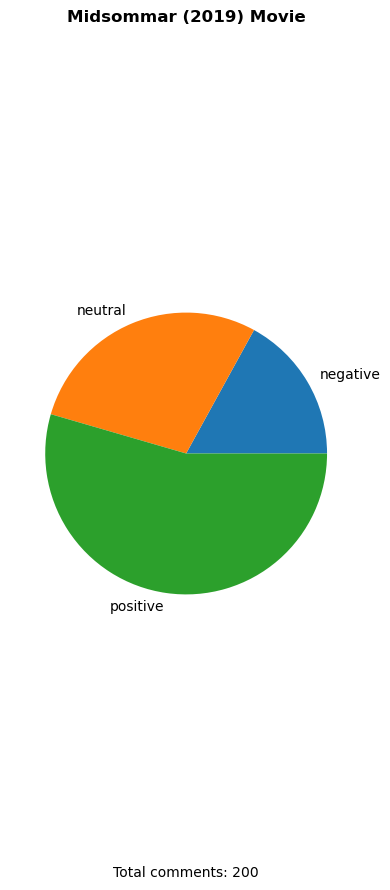

In [90]:
import matplotlib.pyplot as plt

products = sorted(final_comments_df['product'].unique())
sentiments = sorted(final_comments_df['c_sentiment'].unique())
count = 0

plt.figure(figsize=(10, 11))

for product in products:
    labels = sentiments

    val_counts = sorted(final_comments_df[final_comments_df['product'] == product]['c_sentiment'].value_counts())
    sizes = [val_count / sum(val_counts) for val_count in val_counts]

    plt.subplot(len(products)//2 + 1, 2, count % 6 + 1)
    plt.axis('equal')
    plt.title(product, fontweight='bold')

    plt.pie(sizes, labels=labels)
    bottom_text = f"Total comments: {len(final_comments_df[final_comments_df['product'] == product])}"
    plt.text(0.5, 0.0, bottom_text, size=10, ha="center", transform=plt.gca().transAxes)
    count += 1

plt.show()
# We can infer what the majority of people think about the product
# since these laptops are selected from the top 5 best laptops according to lapmag
# the sentiment is likely to be positive as it is here

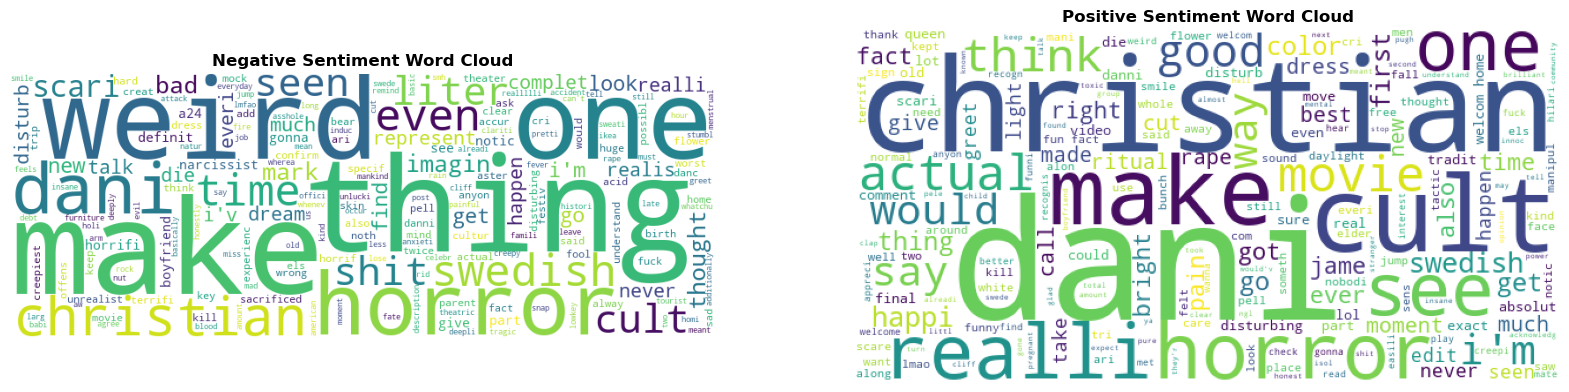

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_comments = final_comments_df[final_comments_df['c_sentiment'] == 'positive']['c_text']
negative_comments = final_comments_df[final_comments_df['c_sentiment'] == 'negative']['c_text']

stop_words = set(stopwords.words('english')).union(product_tokens)
# apply stemming to stop words
stemmer = nltk.stem.SnowballStemmer('english')
stop_words_stemmed = set([stemmer.stem(word) for word in stop_words])

positive_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in positive_comments]

negative_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in negative_comments]

wordcloud_positive = WordCloud(width=600, height=300, background_color='white',
                               stopwords=stop_words_stemmed)\
                                .generate(' '.join(positive_comments_stemmed))
wordcloud_negative = WordCloud(width=800, height=300, background_color='white',
                               stopwords=stop_words_stemmed)\
                                .generate(' '.join(negative_comments_stemmed))



plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Negative Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_negative)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Positive Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_positive)
plt.axis('off')

plt.show()
# shows words present in positive and negative sentiment text 

In [92]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# text_clf = Pipeline([
#     ('vectorizer', TfidfVectorizer()),
#     ('classifier', MultinomialNB())
# ])

# parameters = {
#     'vectorizer': [TfidfVectorizer(),CountVectorizer()],
#     'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'vectorizer__preprocessor':[preprocess_text],
#     'vectorizer__encoding':['utf-8'],
#     # 'vectorizer__max_df': [0.6, 0.9],
#     'vectorizer__min_df': [3],
#     # 'vectorizer__max_features': [1,2,3],
#     # 'vectorizer__norm': ['l1', 'l2'],
#     # 'vectorizer__smooth_idf': [False,True],
#     'vectorizer__binary':[False,True],
#     'vectorizer__lowercase':[False,True],
#     # 'vectorizer__sublinear_tf': [True, False],
#     # 'vectorizer__use_idf': [True, False],
#     'classifier': [
#                     MultinomialNB(),
#                     SVC(),
#                     LogisticRegression(),
#                     RandomForestClassifier()
#                    ],
# }

# grid_search = GridSearchCV(text_clf, parameters, cv=2, n_jobs=1)
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print(classification_report(y_test, y_pred))